# SVM Modelo

In [1]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets

# Importacion SVM
from sklearn.svm import SVC

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split

In [2]:
# Divido el set en entrenamiento y validacion
def getSetEntrenamientoYTest():
  dfTrain = datasets.getDataTrain()
  dfTrain_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfTrain)
  X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
  y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
  return X_train, X_test, y_train, y_test

# Entrenamiento SVM 

In [3]:
X_train, X_test, y_train, y_test = getSetEntrenamientoYTest()

In [4]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Metricas

Accuracy: 0.831260555811454

Precision: 0.752092050209205

Recall: 0.9519464720194647

F1 Score: 0.5668111943240046

Matriz de confusion: 
[[4695  237]
 [ 862  719]]

AUC-ROC: 



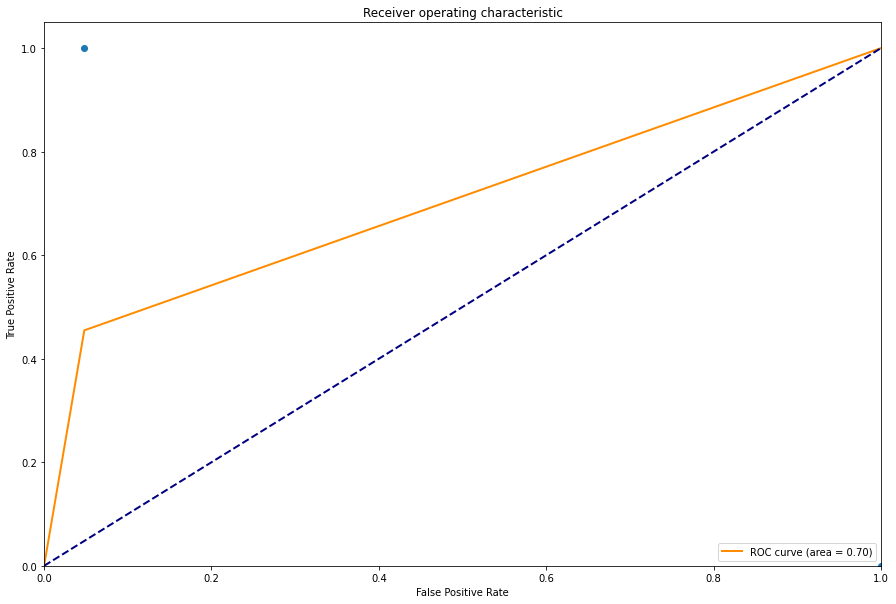

0.7033609652949948

In [5]:
m.metrics(y_test, y_pred)

# Prediccion

In [6]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataValidation()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfObjetivo)

predicciones = clf.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
fp.exportPredictions(fp.formatPredictions(predicciones), "pd_predictions_final_svm")

# Entrenamiento SVM con lineal kernel

In [8]:
# X_train, X_val_dev, y_train, y_val_dev = getSetEntrenamientoYTest()
# clf = SVC(kernel='linear', C=5843)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

## No termina la ejecucion con lineal kernel

# Entrenamiento SVM con polinomial kernel

In [9]:
# X_train, X_val_dev, y_train, y_val_dev = getSetEntrenamientoYTest()
# metrics = []
# for c in range(1, 100, 10):
#     for d in range(1, 100, 10):
#         for g in range(1, 100, 10):
#             for r in range(1, 100, 10):
#                 clf = SVC(kernel='poly', C=c, degree=d, gamma=g, coef0=r)
#                 clf.fit(X_train, y_train)
#                 metrics.append(
#                     (c, d, g, r, (clf.predict(X_val_dev) == y_val_dev).sum())
#                 )

# dd = pd.DataFrame(metrics, columns=['c', 'degree', 'gamma', 'r', 'correct_in_val-dev'])
# dd[dd['correct_in_val-dev'] == dd['correct_in_val-dev'].max()]

## No termina la ejecucion con lineal kernel

# Entrenamiento SVM con radial kernel

In [10]:
X_train, X_val_dev, y_train, y_val_dev = getSetEntrenamientoYTest()

metrics = []
for c in range(1, 10, 10):
    for g in range(1, 10, 10):
        clf = SVC(kernel='rbf', C=c, gamma=g)
        clf.fit(X_train, y_train)
        metrics.append((c, g, (clf.predict(X_val_dev) == y_val_dev).sum()))

dd = pd.DataFrame(metrics, columns=['c', 'gamma', 'correct_in_val-dev'])
dd[dd['correct_in_val-dev'] == dd['correct_in_val-dev'].max()]

,c,gamma,correct_in_val-dev
0,1,1,5092


In [11]:
clf = SVC(kernel='rbf', C=1, gamma=1)
clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Metricas

Accuracy: 0.831260555811454

Precision: 0.752092050209205

Recall: 0.9519464720194647

F1 Score: 0.5668111943240046

Matriz de confusion: 
[[4695  237]
 [ 862  719]]

AUC-ROC: 



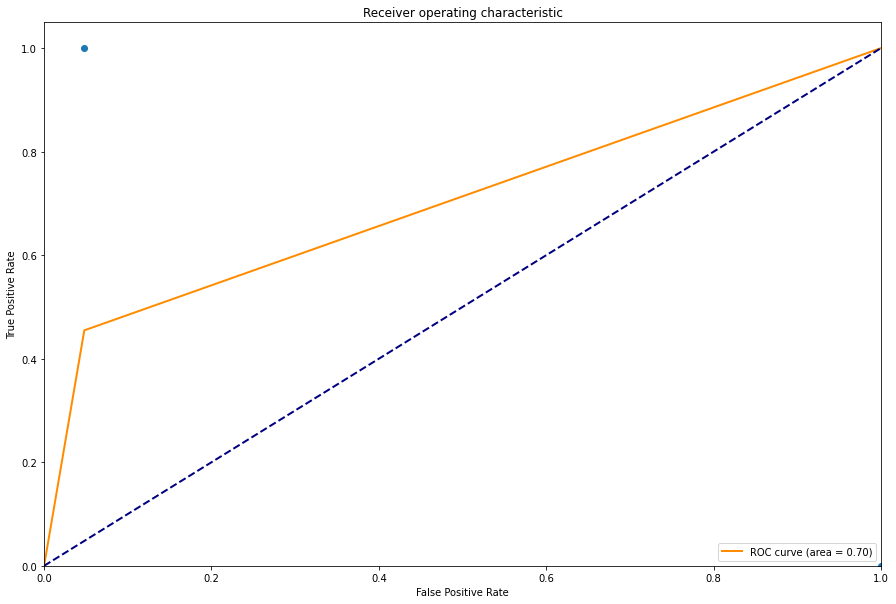

0.7033609652949948

In [12]:
m.metrics(y_test, y_pred)

# Prediccion

In [13]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataValidation()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfObjetivo)

predicciones = clf.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
fp.exportPredictions(fp.formatPredictions(predicciones), "pd_predictions_final_svm_radial_kernel")